In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns

%matplotlib notebook

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data = data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color', 'type']]
data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
encoded_data = data.copy()
str_column_names = ['color', 'type']
le = LabelEncoder()
for column_name in str_column_names:
    encoded_data[column_name] = le.fit(data[column_name]).transform(data[column_name])

In [5]:
encoded_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
3,0.776652,0.508723,0.636766,0.884464,0,1
4,0.566117,0.875862,0.418594,0.636438,4,0


In [6]:
# encoded_data_without_type = encoded_data[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']]
# columns = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']
columns = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'] # without `color`
# columns = ['rotting_flesh', 'hair_length', 'has_soul'] # without `color` and `bone_length`
encoded_data_without_type = encoded_data[columns]
encoded_data_type = encoded_data['type']
x_train, x_test, y_train, y_test = train_test_split(encoded_data_without_type,
                                                    encoded_data_type,
                                                    test_size=0.37, # best with 0.37
                                                    random_state=600,
                                                    shuffle=False)

In [7]:
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

   bone_length  rotting_flesh  hair_length  has_soul
0     0.354512       0.350839     0.465761  0.781142
1     0.575560       0.425868     0.531401  0.439899
2     0.467875       0.354330     0.811616  0.791225
3     0.776652       0.508723     0.636766  0.884464
4     0.566117       0.875862     0.418594  0.636438
     bone_length  rotting_flesh  hair_length  has_soul
233     0.334552       0.500769     0.682656  0.627086
234     0.284451       0.220268     0.357405  0.316073
235     0.336573       0.243092     0.253459  0.545023
236     0.451085       0.464508     0.505819  0.509010
237     0.523789       0.657317     0.818979  0.624504
0    1
1    2
2    1
3    1
4    0
Name: type, dtype: int64
233    1
234    2
235    2
236    2
237    1
Name: type, dtype: int64


In [8]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.34699191106702598

In [9]:
model = LogisticRegression()
model.fit(x_train, y_train)

print("train: ", model.score(x_train[columns], y_train))
print("test: ", model.score(x_test[columns], y_test))

train:  0.738197424893
test:  0.717391304348


In [10]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = LogisticRegression(C=c)
    model.fit(x_train, y_train)
    print(c)
    print("train: ", model.score(x_train[columns], y_train))
    print("test: ", model.score(x_test[columns], y_test))
    print("====================")

0.001
train:  0.50643776824
test:  0.463768115942
0.01
train:  0.523605150215
test:  0.471014492754
0.1
train:  0.716738197425
test:  0.659420289855
1
train:  0.738197424893
test:  0.717391304348
10
train:  0.772532188841
test:  0.739130434783
100
train:  0.785407725322
test:  0.753623188406
1000
train:  0.785407725322
test:  0.753623188406


In [11]:
# best_solution = 0
# index = 0
# for c in range(1000,2000):
#     model = LogisticRegression(C=c)
#     model.fit(x_train, y_train)
    
#     result = model.score(x_test[columns], y_test)
#     if result > best_solution:
#         index = c
#         best_solution = result
#     if c % 100 == 0:
#         print(c)
#         print("Current best solution: ", best_solution)
#         print("Current best index: ", index)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# indexes_for_point_four = [654, 1280, 7430, 12038]
indexes_for_point_three_seven = [3219] # 0.37
for i in indexes_for_point_three_seven:
    classifier = RandomForestClassifier(max_depth=1000,
                                        random_state=int(i)).fit(x_train, y_train)
    print("random_state: ", int(i))
    print("train: ", classifier.score(x_train[columns], y_train))
    print("test: ", classifier.score(x_test[columns], y_test))
    print("==============")

# best for 0.793103448276



# best_solution = 0
# index = 0
# for i in range(2000, 4000):
#     classifier = RandomForestClassifier(random_state=int(i)).fit(x_train, y_train)
#     result = classifier.score(x_test[columns], y_test)

#     if result > best_solution:
#         index = i
#         best_solution = result
#     if i % 100 == 0:
#         print(i)
#         print("Current best solution: ", best_solution)
#         print("Current best index: ", index)

# print("Best solution: ", best_solution)
# print("Best index: ", index)

random_state:  3219
train:  0.978540772532
test:  0.811594202899


In [13]:
classifier = RandomForestClassifier(random_state=1280).fit(x_train, y_train)
classifier.feature_importances_


array([ 0.17826545,  0.20274282,  0.36281231,  0.25617942])

       bone_length  rotting_flesh  hair_length    has_soul       color  \
count   371.000000     371.000000   371.000000  371.000000  371.000000   
mean      0.434160       0.506848     0.529114    0.471392    3.404313   
std       0.132833       0.146358     0.169902    0.176129    1.615259   
min       0.061032       0.095687     0.134600    0.009402    0.000000   
25%       0.340006       0.414812     0.407428    0.348002    3.000000   
50%       0.434891       0.501552     0.538642    0.466372    3.000000   
75%       0.517223       0.603977     0.647244    0.600610    5.000000   
max       0.817001       0.932466     1.000000    0.935721    5.000000   

             type  
count  371.000000  
mean     1.021563  
std      0.808448  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


<IPython.core.display.Javascript object>


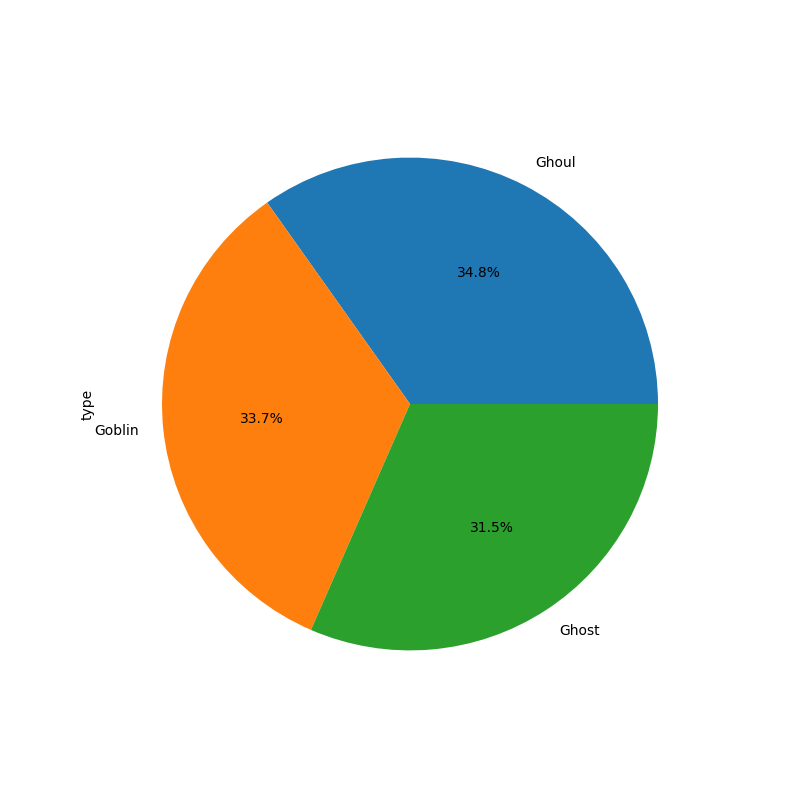

In [14]:
print(encoded_data.describe())
data['type'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.1f%%');


In [15]:
data[data.type == 'Ghoul'].describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,129.000000,129.000000,129.000000,129.000000
mean,0.517159,0.490515,0.655550,0.601634
std,0.120600,0.115357,0.138127,0.134813
min,0.200753,0.172182,0.287008,0.280854
25%,0.439625,0.417474,0.556691,0.501544
50%,0.515397,0.491497,0.667384,0.600393
75%,0.590384,0.561786,0.751614,0.698480
max,0.817001,0.779153,1.000000,0.935721


In [16]:
data[data.type == 'Ghost'].describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,117.000000,117.000000,117.000000,117.000000
mean,0.347466,0.593759,0.373186,0.320023
std,0.117748,0.142150,0.117642,0.139790
min,0.061032,0.165539,0.134600,0.009402
25%,0.269748,0.504399,0.299507,0.230361
50%,0.340442,0.603780,0.365142,0.307534
75%,0.417253,0.682687,0.461068,0.415930
max,0.622371,0.932466,0.636340,0.689980


In [17]:
data[data.type == 'Goblin'].describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,125.000000,125.000000,125.000000,125.000000
mean,0.429650,0.442357,0.544581,0.478663
std,0.101917,0.140284,0.116964,0.127293
min,0.208625,0.095687,0.239212,0.194413
25%,0.355313,0.341187,0.474255,0.377121
50%,0.430797,0.457490,0.558776,0.466024
75%,0.492438,0.530852,0.621787,0.557136
max,0.678519,0.840049,0.840013,0.854949


In [18]:
encoded_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392,3.404313,1.021563
std,0.132833,0.146358,0.169902,0.176129,1.615259,0.808448
min,0.061032,0.095687,0.134600,0.009402,0.000000,0.000000
25%,0.340006,0.414812,0.407428,0.348002,3.000000,0.000000
50%,0.434891,0.501552,0.538642,0.466372,3.000000,1.000000
75%,0.517223,0.603977,0.647244,0.600610,5.000000,2.000000
max,0.817001,0.932466,1.000000,0.935721,5.000000,2.000000


In [19]:
encoded_data[encoded_data.type==0].describe()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.0
mean,0.347466,0.593759,0.373186,0.320023,3.367521,0.0
std,0.117748,0.142150,0.117642,0.139790,1.689717,0.0
min,0.061032,0.165539,0.134600,0.009402,0.000000,0.0
25%,0.269748,0.504399,0.299507,0.230361,3.000000,0.0
50%,0.340442,0.603780,0.365142,0.307534,4.000000,0.0
75%,0.417253,0.682687,0.461068,0.415930,5.000000,0.0
max,0.622371,0.932466,0.636340,0.689980,5.000000,0.0


In [20]:
encoded_data[encoded_data.type==1].describe()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,0.517159,0.490515,0.655550,0.601634,3.441860,1.0
std,0.120600,0.115357,0.138127,0.134813,1.619737,0.0
min,0.200753,0.172182,0.287008,0.280854,0.000000,1.0
25%,0.439625,0.417474,0.556691,0.501544,3.000000,1.0
50%,0.515397,0.491497,0.667384,0.600393,3.000000,1.0
75%,0.590384,0.561786,0.751614,0.698480,5.000000,1.0
max,0.817001,0.779153,1.000000,0.935721,5.000000,1.0


In [21]:
encoded_data[encoded_data.type==2].describe()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.0
mean,0.429650,0.442357,0.544581,0.478663,3.400000,2.0
std,0.101917,0.140284,0.116964,0.127293,1.550234,0.0
min,0.208625,0.095687,0.239212,0.194413,0.000000,2.0
25%,0.355313,0.341187,0.474255,0.377121,3.000000,2.0
50%,0.430797,0.457490,0.558776,0.466024,3.000000,2.0
75%,0.492438,0.530852,0.621787,0.557136,5.000000,2.0
max,0.678519,0.840049,0.840013,0.854949,5.000000,2.0
